## What is Support Vector Machine?

At its heart, Support Vector Machine tries to find the **best-fitting hyperplane** that separates data points of different classes with the widest possible margin.

Imagine you have two groups of customers. SVM helps us draw a line (or plane) that best separates these groups, allowing us to predict whether a new customer will churn.


# Using SVMs to Recognize Handwritten Digits

Step 1: Understanding the MNIST Dataset

Loading MNIST dataset...
Dataset shape: (70000, 784)
Labels shape: (70000,)
Number of classes: 10


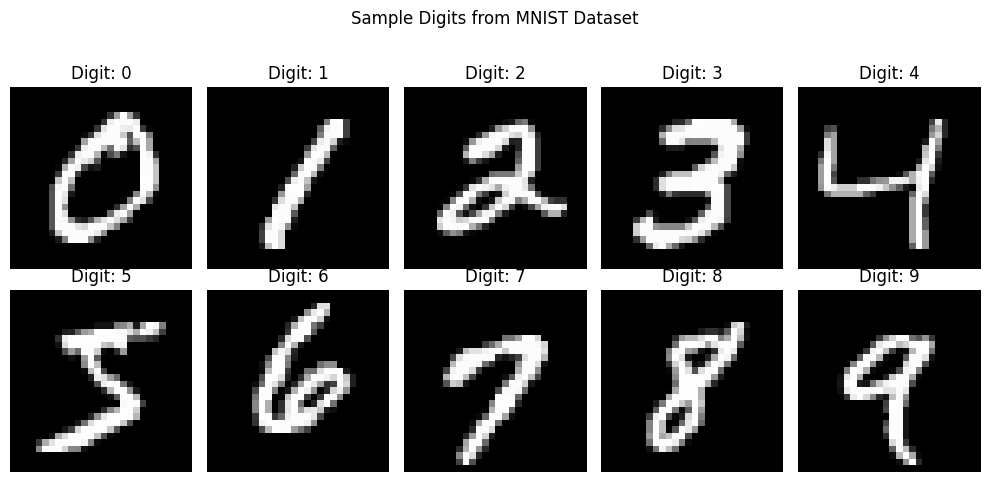

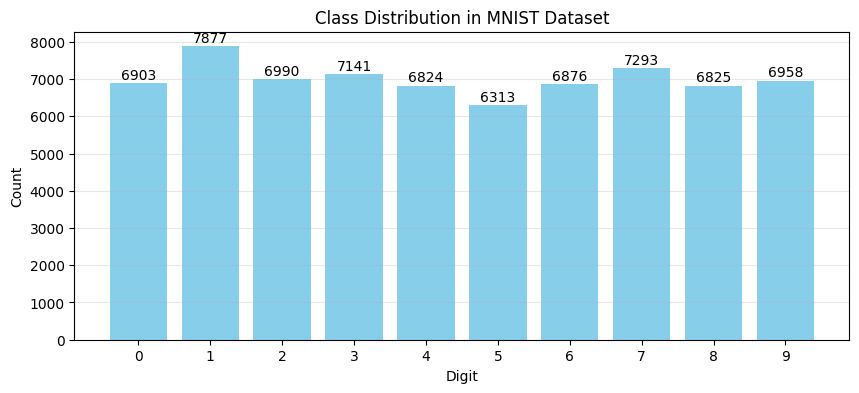

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', as_frame=False)

# Extract features and target labels
X, y = mnist['data'], mnist['target']
X = X.astype(int)
y = y.astype(int)

# Display basic information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Number of classes: {len(np.unique(y))}")

 #Preview sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = X[y == i][0].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit: {i}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Digits from MNIST Dataset")
plt.subplots_adjust(top=0.85)
plt.show()

# Show class distribution
plt.figure(figsize=(10, 4))
# Count occurrences of each digit
digit_counts = np.bincount(y)
plt.bar(range(10), digit_counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution in MNIST Dataset')
plt.xticks(range(10))
for i, count in enumerate(digit_counts):
    plt.text(i, count + 100, str(count), ha='center')
plt.grid(axis='y', alpha=0.3)
plt.show()

## Step 2: Preprocessing the Data

In [6]:
# Normalize the pixel values to improve SVM performance
from sklearn.preprocessing import MinMaxScaler

# Create a scaler that will transform values to range [0,1]
scaler = MinMaxScaler()

# Apply scaling to our data
X_scaled = scaler.fit_transform(X)

# Verify the scaling worked as expected
print(f"Min value after scaling: {X_scaled.min()}")
print(f"Max value after scaling: {X_scaled.max()}")

Min value after scaling: 0.0
Max value after scaling: 1.0


## Step 3: Splitting the Dataset

In [7]:
# Create training and testing sets to evaluate model performance
from sklearn.model_selection import train_test_split

# Split data: 90% for training, 10% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42
)

# Display the shapes to confirm the split
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (63000, 784)
Testing data shape: (7000, 784)


##Step 4: Training the SVM Model

In [ ]:
# Import and create our SVM classifier
from sklearn.svm import SVC

# Initialize the model with a linear kernel
print("Training SVM model...")
svm_clf = SVC(kernel='linear')

# Train the model on our training data
svm_clf.fit(X_train, y_train)
print("Model training complete!")

Training SVM model...
Model training complete!


##Step 5: Making Predictions and Evaluating the Model

In [ ]:
# Evaluate model performance on test data
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions on test data
print("Making predictions on test data...")
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Making predictions on test data...
SVM Model Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       683
           1       0.96      0.98      0.97       800
           2       0.91      0.93      0.92       674
           3       0.90      0.92      0.91       760
           4       0.93      0.95      0.94       611
           5       0.91      0.90      0.91       658
           6       0.96      0.95      0.96       677
           7       0.94      0.94      0.94       724
           8       0.93      0.89      0.91       693
           9       0.95      0.92      0.93       720

    accuracy                           0.94      7000
   macro avg       0.94      0.94      0.94      7000
weighted avg       0.94      0.94      0.94      7000



##Step 6: Visualizing Digits and Decision Boundaries

Visualizing a sample digit...


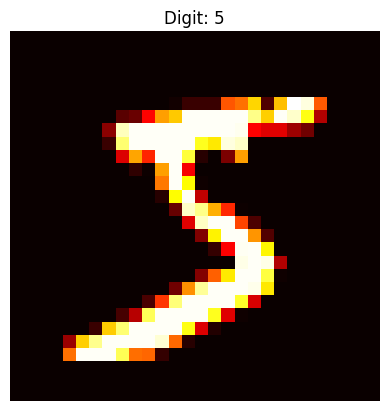

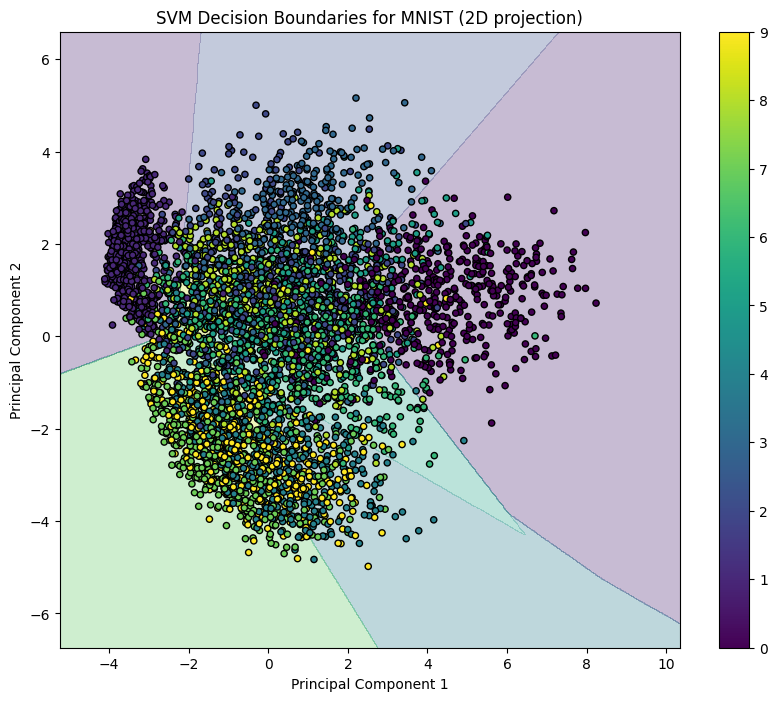

In [ ]:
# Create a function to visualize digits
def plot_digit(data):
    """
    Visualize a single digit from the MNIST dataset

    Parameters:
    data: array of pixel values for a digit
    """
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.hot, interpolation="nearest")
    plt.axis("off")

# Display a sample digit
print("Visualizing a sample digit...")
some_digit = X[0]
plot_digit(some_digit)
plt.title(f"Digit: {y[0]}")
plt.show()


# Visualize SVM decision boundaries for two features
# We'll use PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Create a simplified SVM model on the reduced data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_reduced[:10000], y[:10000])  # Use a subset for faster training

# Create a mesh grid to plot decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get predictions for all points in the mesh
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:5000, 0], X_reduced[:5000, 1], c=y[:5000],
            edgecolor='k', s=20)
plt.title("SVM Decision Boundaries for MNIST (2D projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()
